In [1]:
## IMPORTS

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import copy

from keras import models
from keras import layers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn import preprocessing
# from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

import imblearn

import os

In [2]:
## FONCTIONS ET VARIABLES UTILES

# def read_text_file(file_path):
#     with open(file_path, encoding='ISO-8859-1') as f:
#         lines = f.readlines()
#         return lines
        
def read_number_line(some_line):
    return [float(s) for s in some_line.split()]

my_dpi = np.sqrt(1920**2 + 1080**2)/17.3 #dpi de l'écran

On tente tout d'abord une approche par clustering pour séparer les signaux bruités des autres de manière non supervisée:

In [3]:
## IMPORT DES DONNEES

train_folder = "C:/Users/victo/stage_navier_jupyter/data_eurotunnel/data_png/training_png/"
val_folder = "C:/Users/victo/stage_navier_jupyter/data_eurotunnel/data_png/validation_png/"

pk_folder_train = "1775_20190128/"
pk_folder_val = "4250_20190225/"

train_path = train_folder + pk_folder_train
val_path = val_folder + pk_folder_val

buffer

In [4]:
## ON TEST SUR UN DOSSIER ENTIER POUR VOIR LE TEMPS DE CALCUL

x_train = []

os.chdir(train_folder+pk_folder_train)
for file_name in os.listdir():
    if file_name.endswith("fourier.png"):
        img_path = train_folder + pk_folder_train + "/" + file_name
        img = image.load_img(img_path, target_size=(600, 400))
        x = image.img_to_array(img)
        x = x.reshape((1,) + x.shape)
        x = np.divide(x, 255.)
        x_train.append(x)
        
x_train_array = np.array(x_train)
example = x_train_array[42]
print(example[0, 372, 257, 2])

prod = 1
for i in range(1, len(x_train_array.shape)):
    prod *= x_train_array.shape[i]
    print(prod)
x_train_array = np.reshape(x_train_array, (x_train_array.shape[0], prod))

print(x_train_array.shape)

kmeans_3 = KMeans(n_clusters=3, n_init=20)
y_pred_kmeans_3 = kmeans_3.fit_predict(x_train_array)

print(y_pred_kmeans_3)



1.0
1
600
240000
720000
(162, 720000)
[0 0 2 0 0 0 0 1 1 2 0 0 2 2 2 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 2 0 1 0
 0 2 0 0 0 2 2 0 0 1 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 2 1 2 1 2 1 1 1 1 1 1 0 2 1 1 1 1 2 1 1 1 1 1 1 0 1 1 1 1 1
 2 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 2 1 0 2 0 0 0 1 0 1 1 1 1 0 0 1 2
 2 2 0 0 1 0 0 1 2 1 1 1 1 0]


On évalue comment s'est fait ce clustering en affichant d'abord toutes les images de la classe "2", puis toutes celles de la classe "1", puis toutes celles de la classe "0"

24
014


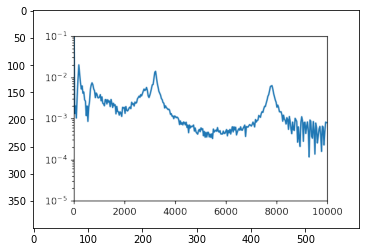

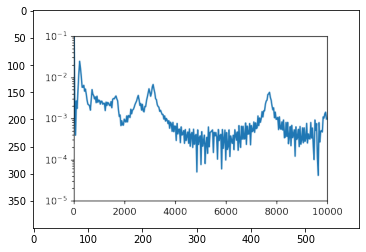

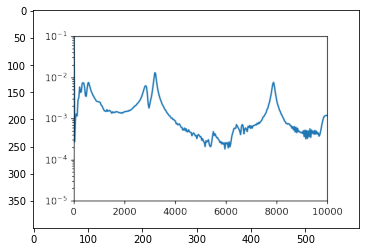

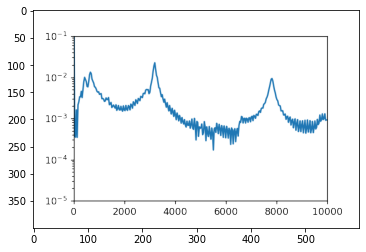

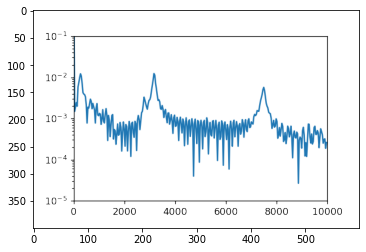

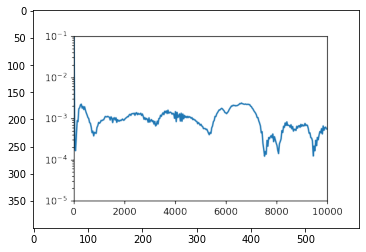

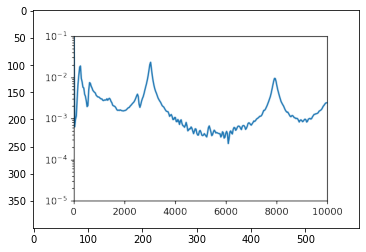

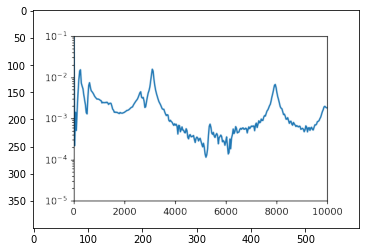

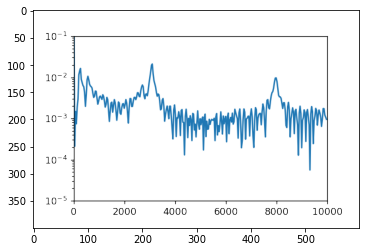

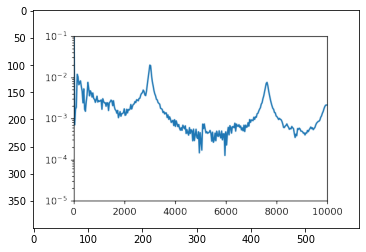

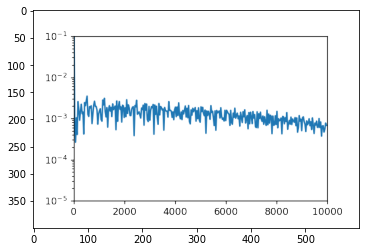

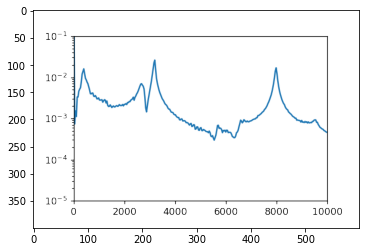

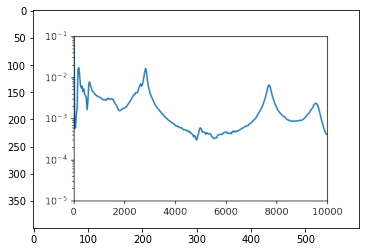

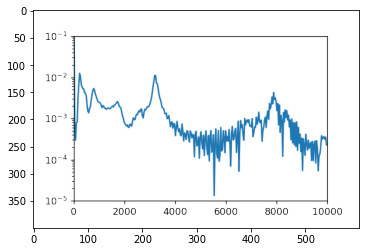

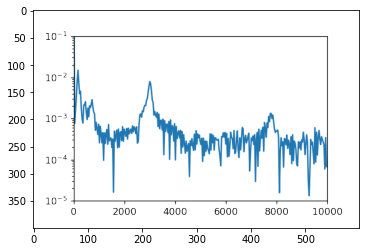

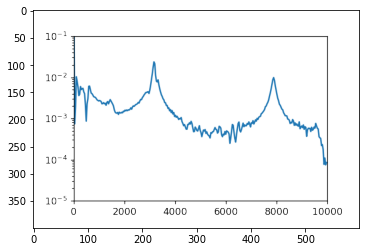

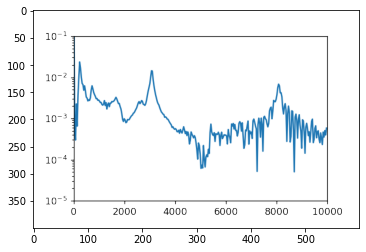

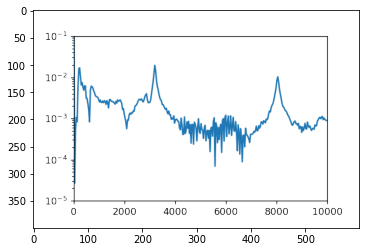

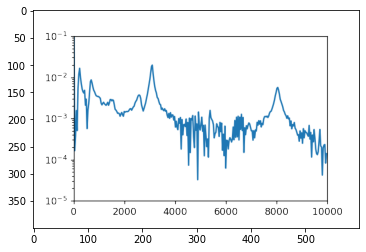

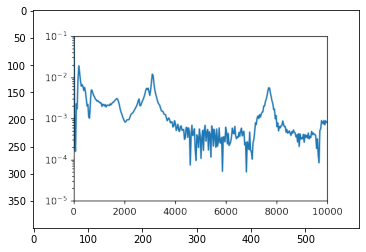

In [5]:
##AFFICHAGE DE LA CLASSE "2"

# print(y_pred_kmeans_3[0]) #c'est bien un 1
# print(len(y_pred_kmeans_3)) #c'est bien 162

two_ind = []
for i in range(len(y_pred_kmeans_3)):
    if y_pred_kmeans_3[i] == 2:
        two_ind.append(i)

print(len(two_ind)) #24

two_ind_str = [str(x).zfill(3) for x in two_ind]

print(two_ind_str[4]) #014

os.chdir(train_folder+pk_folder_train)
for file_name in os.listdir():
    if file_name.endswith("_fourier.png"):
        prefix = file_name[:3] #_D_ ou _G_
        infix = file_name[3:6] #numéro du blochet
        
        if prefix == '_D_':
            if infix in two_ind_str:
                img = mpimg.imread(train_folder+pk_folder_train+file_name)
                imgplot = plt.imshow(img)
                plt.show()
        
        elif prefix == '_G_':
            nfx = int(infix)
            nfx += (len(y_pred_kmeans_3) // 2) #nombre pair par construction
            infix = str(nfx) #ceux de gauche sont lus après tous ceux de droite
            if infix in two_ind_str:
                img = mpimg.imread(train_folder+pk_folder_train+file_name)
                imgplot = plt.imshow(img)
                plt.show()

54
027


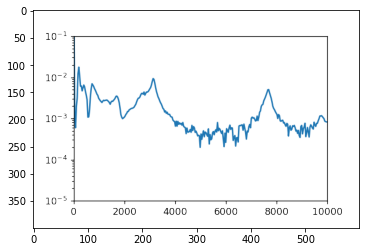

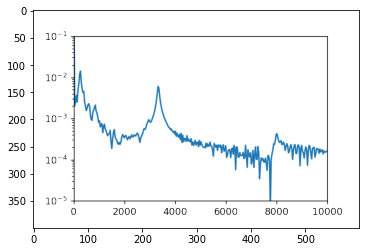

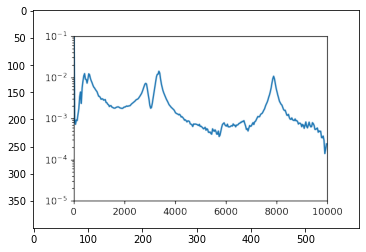

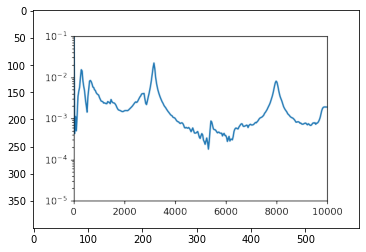

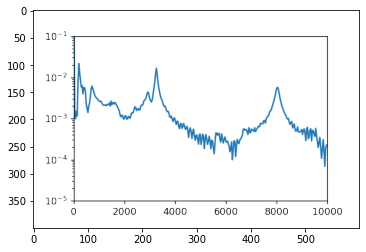

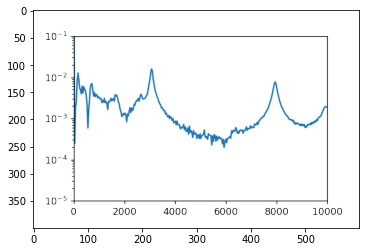

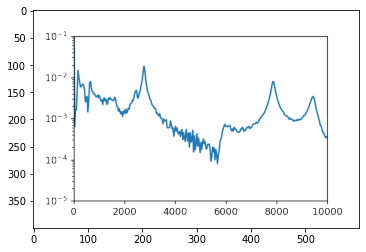

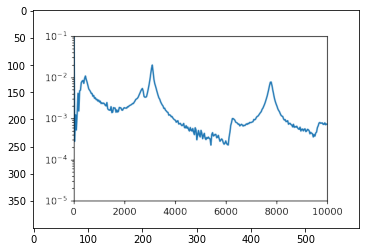

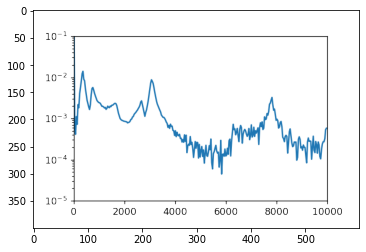

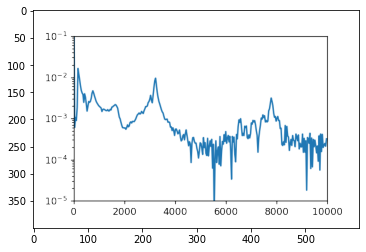

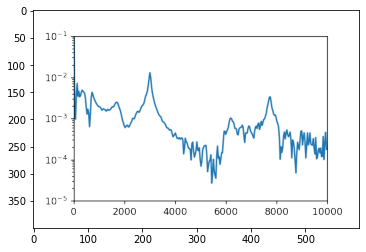

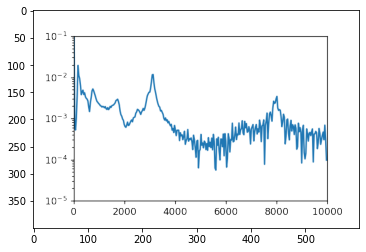

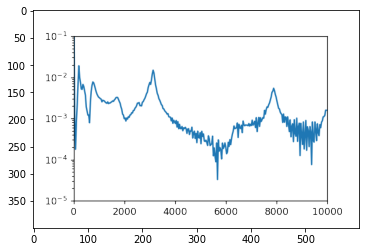

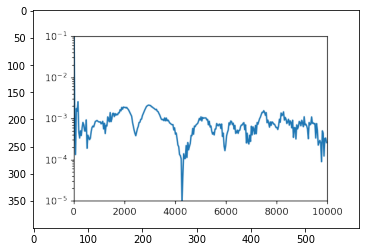

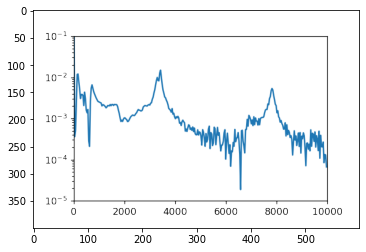

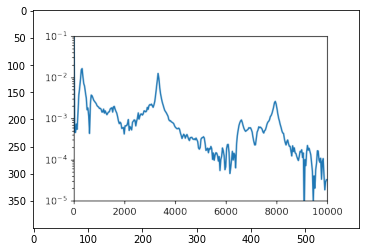

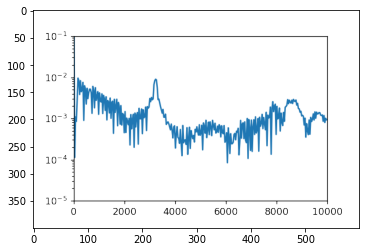

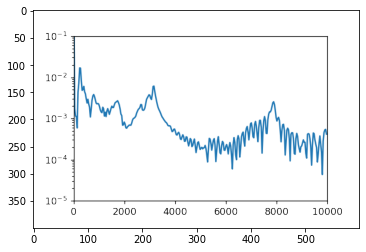

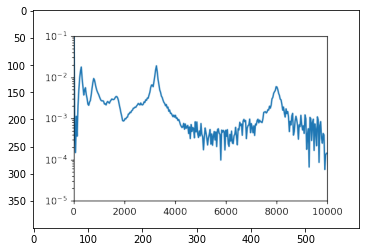

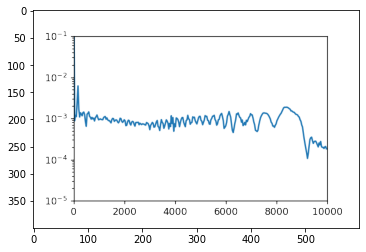

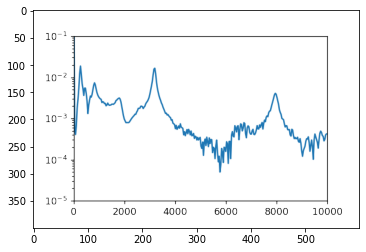

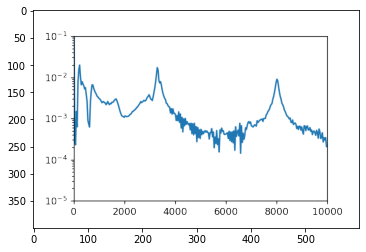

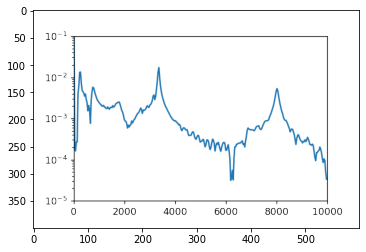

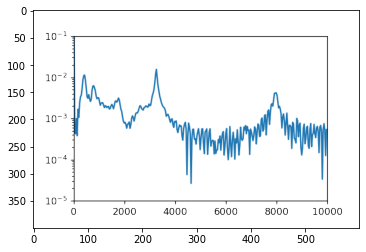

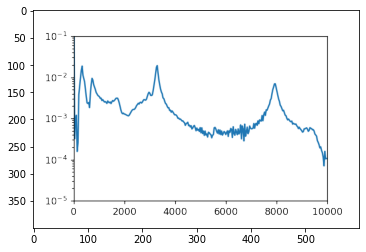

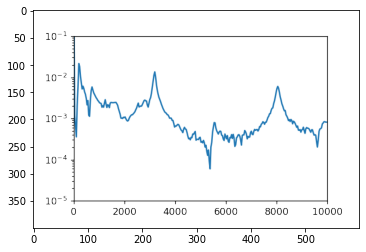

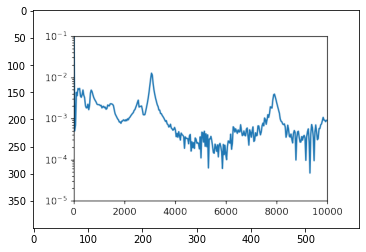

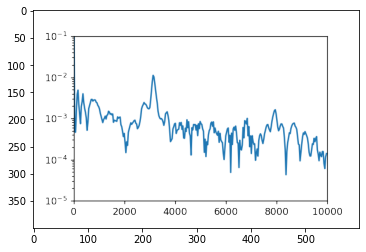

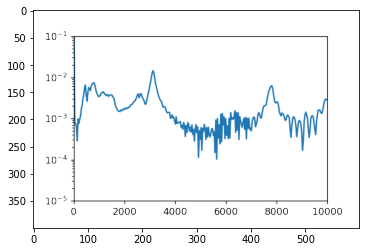

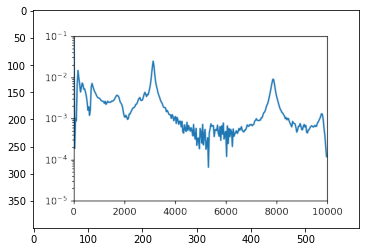

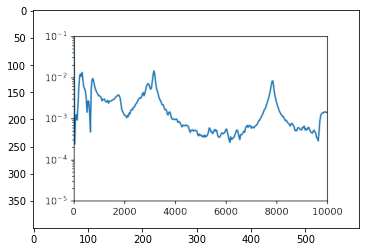

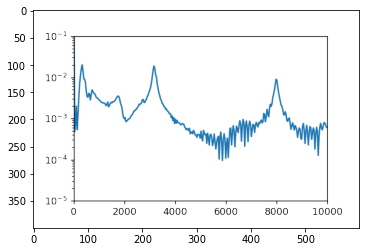

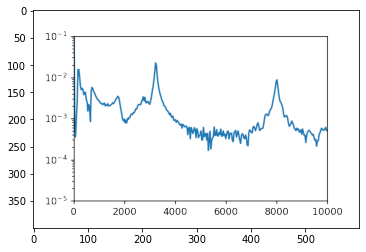

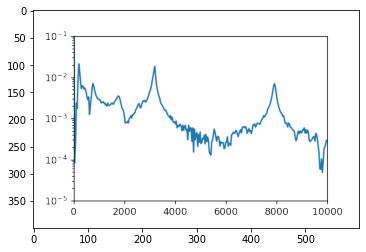

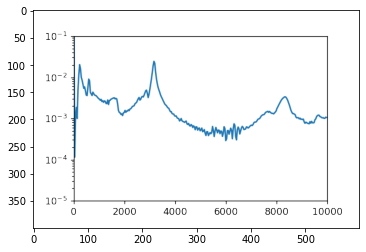

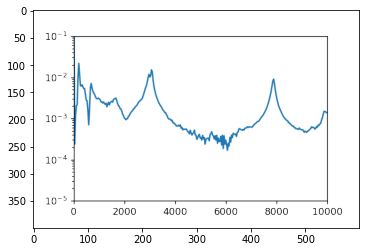

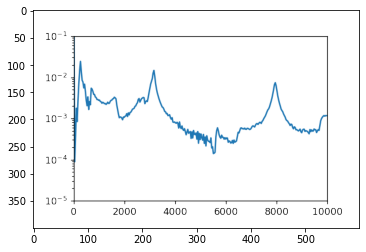

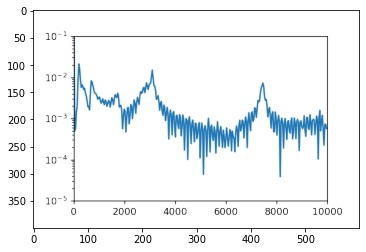

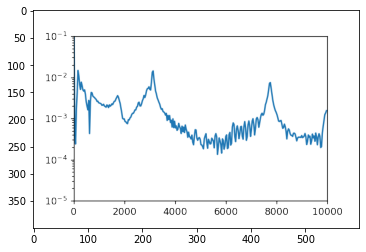

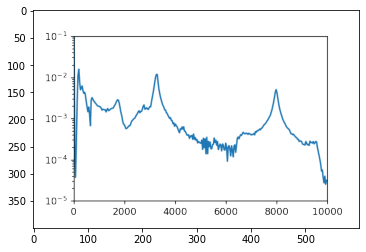

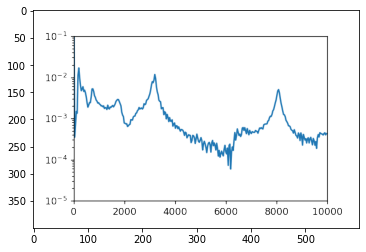

In [6]:
##AFFICHAGE DE LA CLASSE "1"

# print(y_pred_kmeans_3[0]) #c'est bien un 1
# print(len(y_pred_kmeans_3)) #c'est bien 162

one_ind = []
for i in range(len(y_pred_kmeans_3)):
    if y_pred_kmeans_3[i] == 1:
        one_ind.append(i)

print(len(one_ind)) #54

one_ind_str = [str(x).zfill(3) for x in one_ind]

print(one_ind_str[4]) #027

os.chdir(train_folder+pk_folder_train)
for file_name in os.listdir():
    if file_name.endswith("_fourier.png"):
        prefix = file_name[:3] #_D_ ou _G_
        infix = file_name[3:6] #numéro du blochet
        
        if prefix == '_D_':
            if infix in one_ind_str:
                img = mpimg.imread(train_folder+pk_folder_train+file_name)
                imgplot = plt.imshow(img)
                plt.show()
        
        elif prefix == '_G_':
            nfx = int(infix)
            nfx += (len(y_pred_kmeans_3) // 2)
            infix = str(nfx) #ceux de gauche sont lus après tous ceux de droite
            if infix in one_ind_str:
                img = mpimg.imread(train_folder+pk_folder_train+file_name)
                imgplot = plt.imshow(img)
                plt.show()

84
005


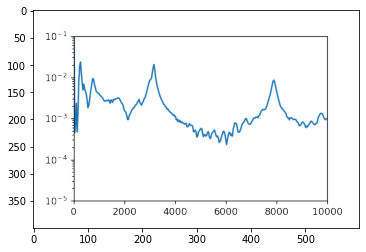

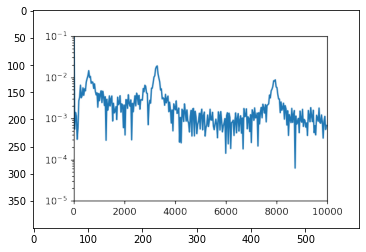

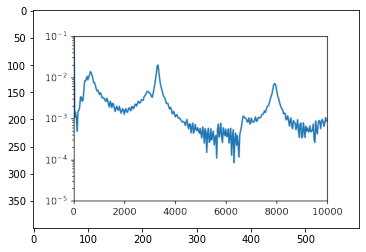

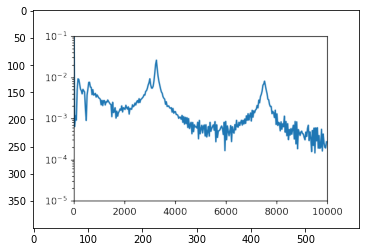

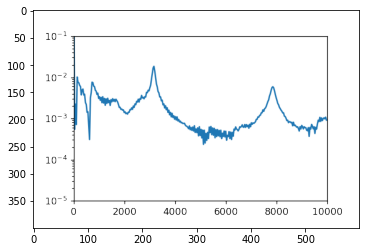

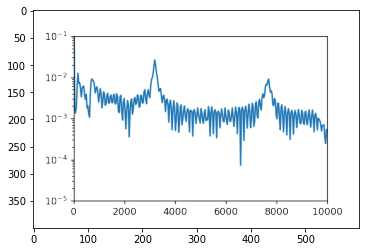

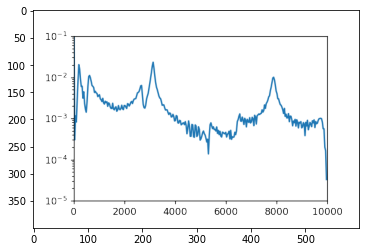

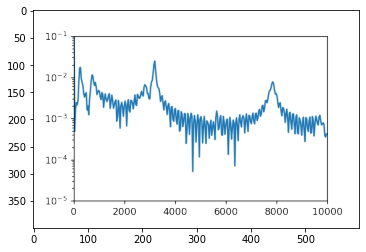

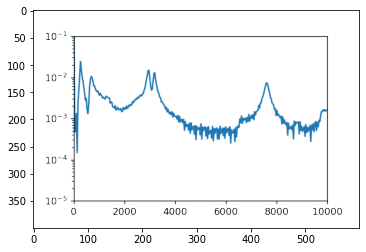

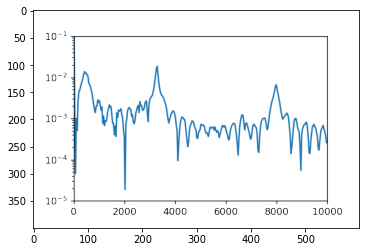

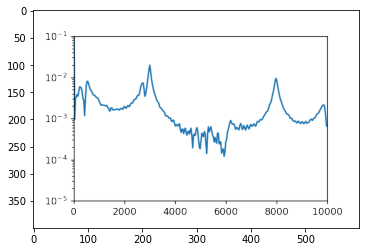

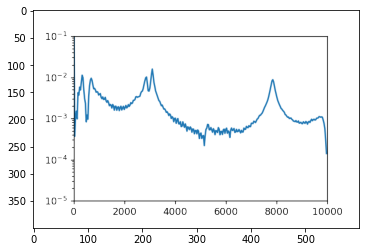

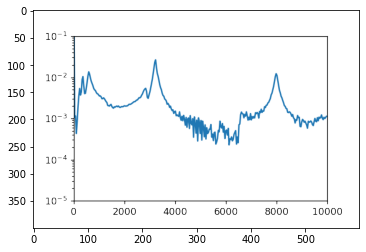

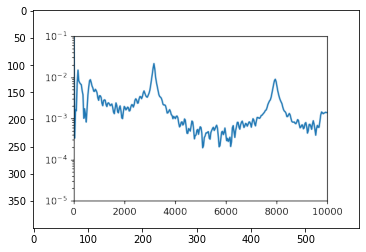

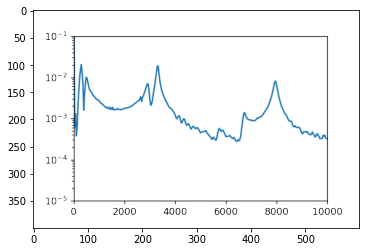

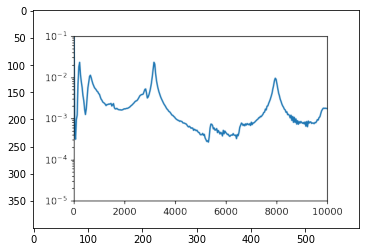

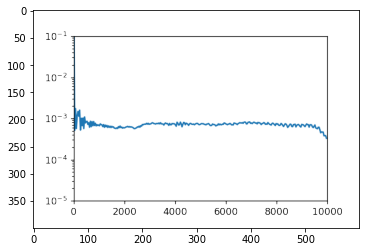

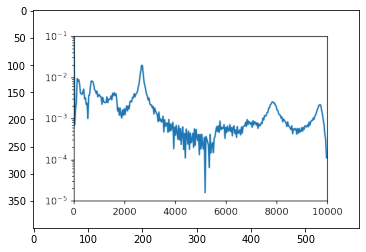

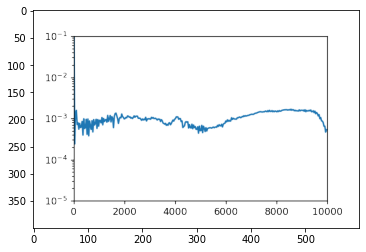

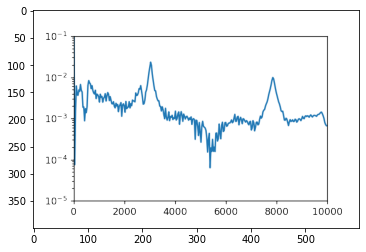

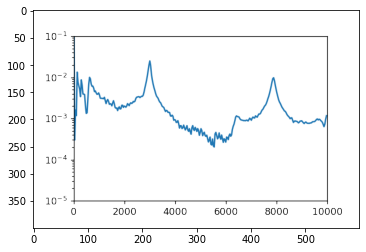

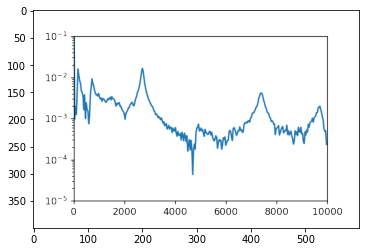

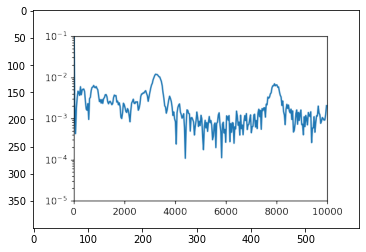

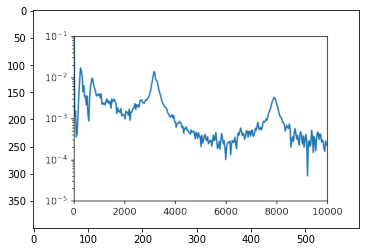

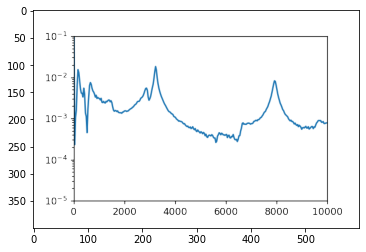

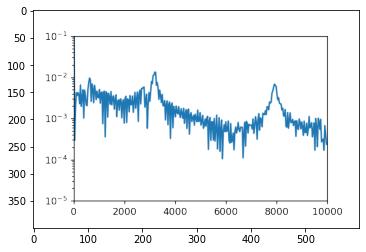

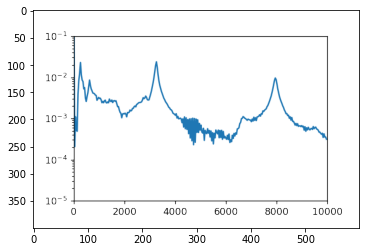

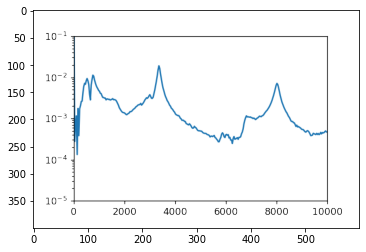

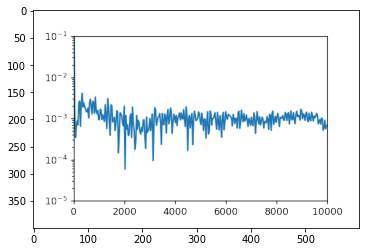

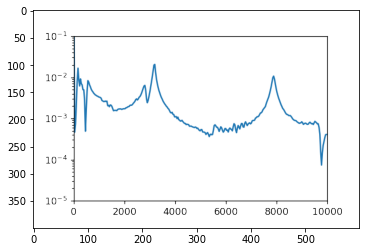

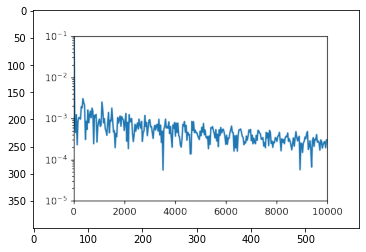

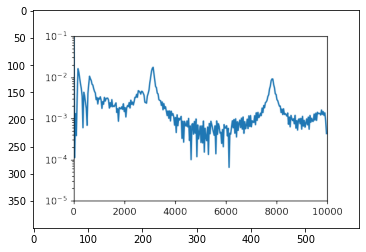

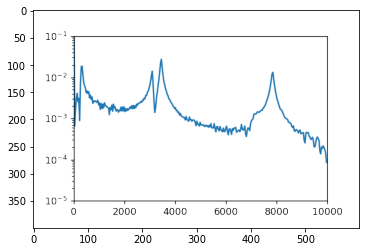

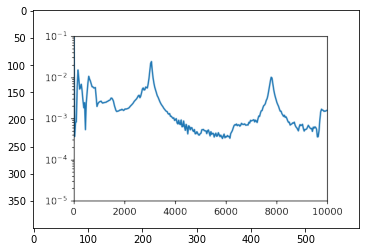

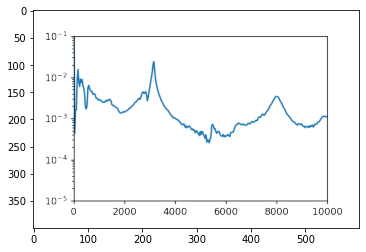

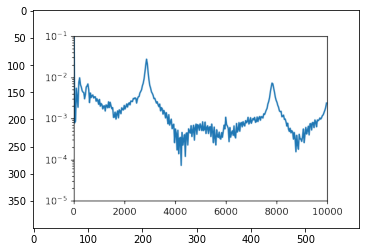

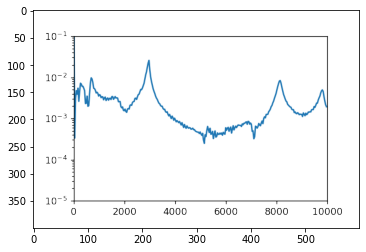

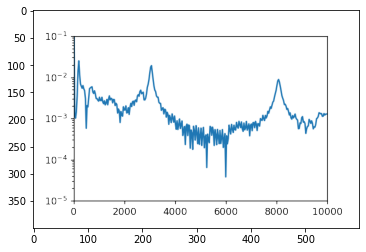

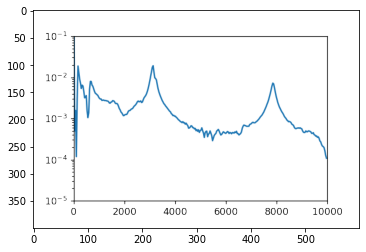

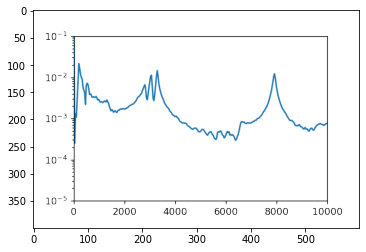

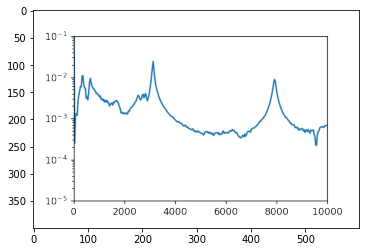

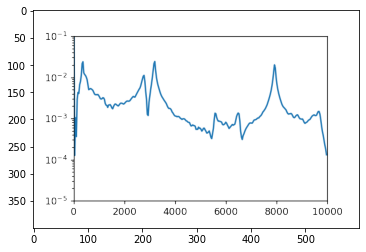

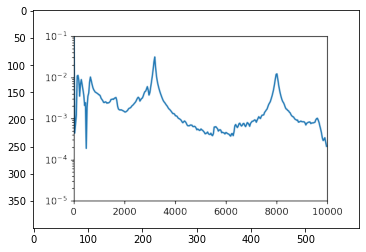

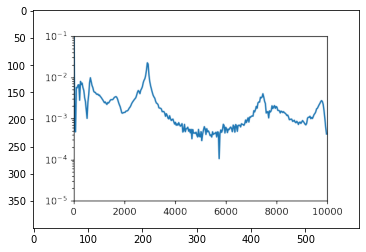

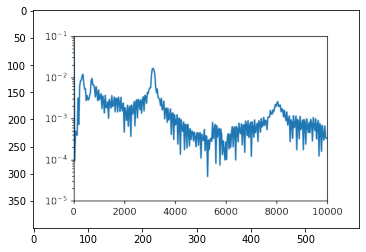

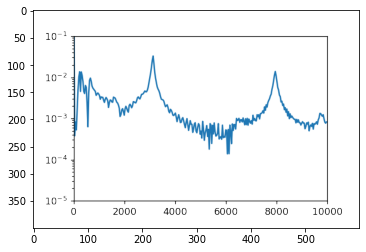

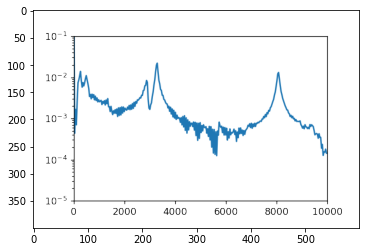

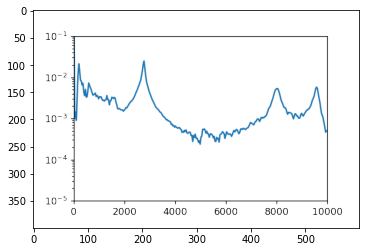

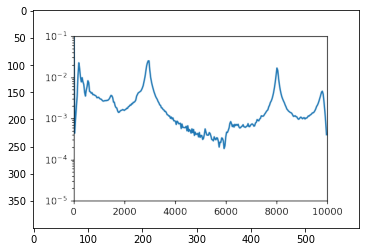

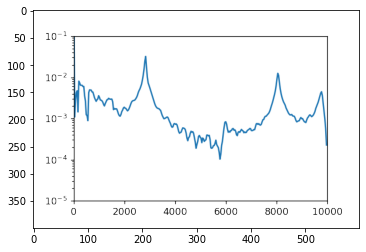

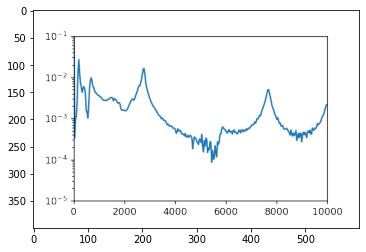

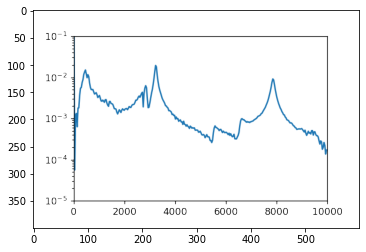

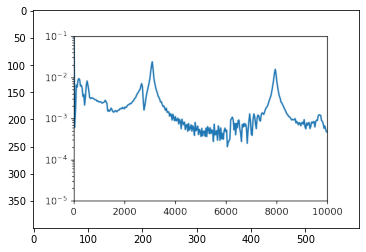

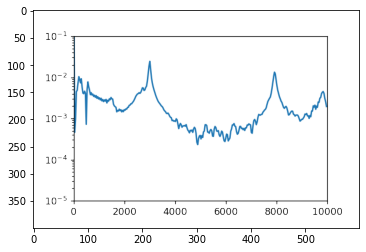

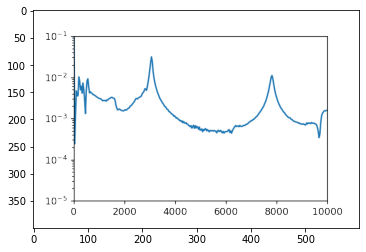

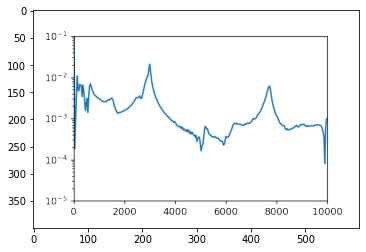

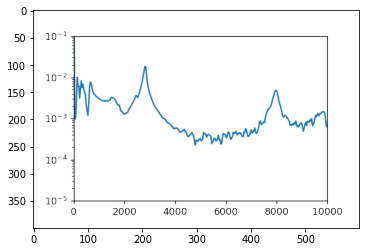

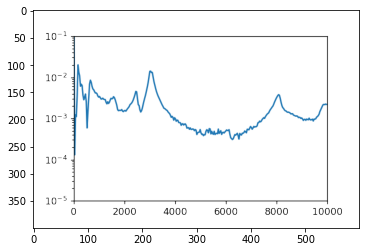

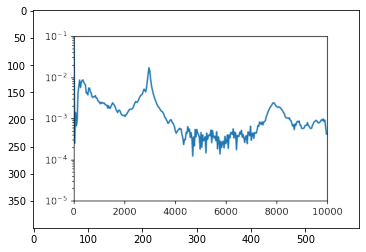

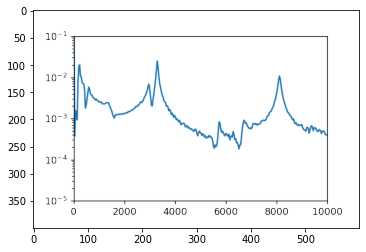

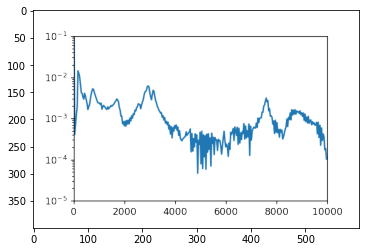

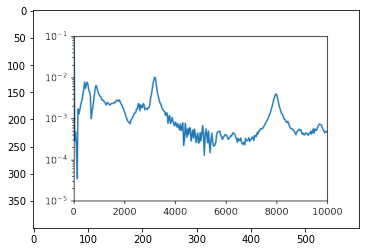

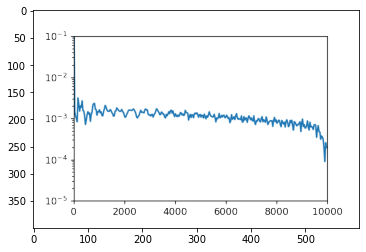

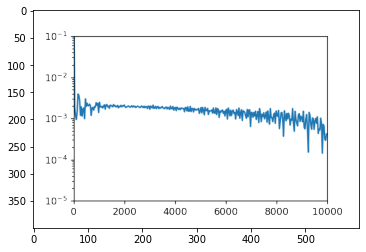

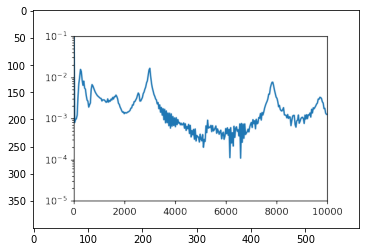

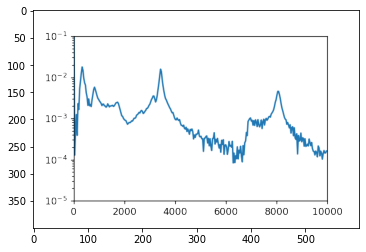

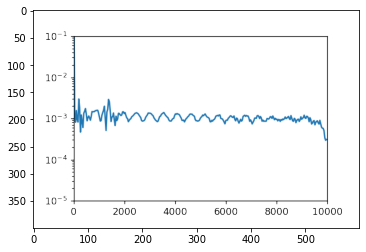

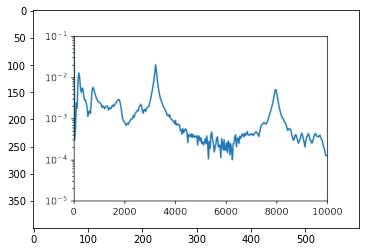

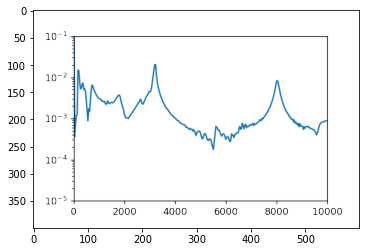

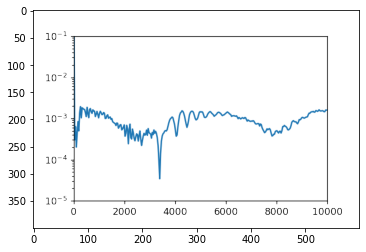

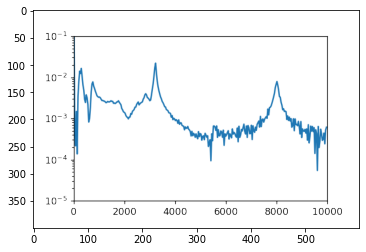

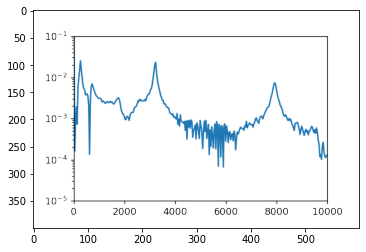

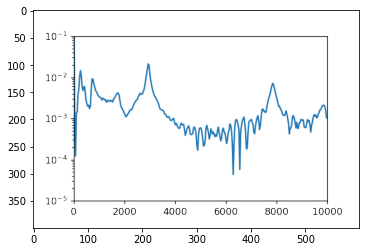

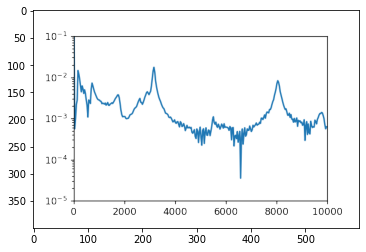

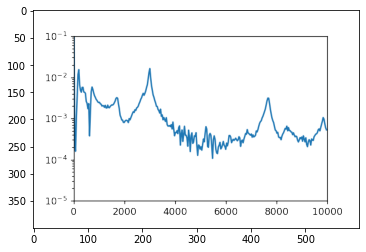

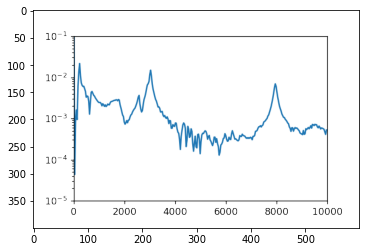

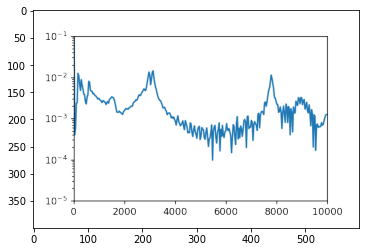

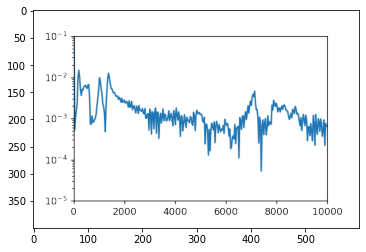

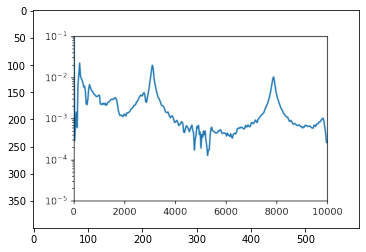

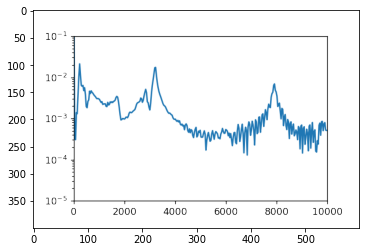

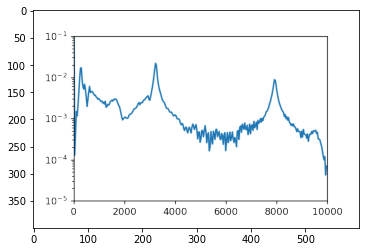

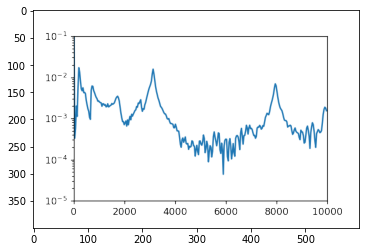

In [7]:
##AFFICHAGE DE LA CLASSE "0"

# print(y_pred_kmeans_2[0]) #c'est bien un 1
# print(len(y_pred_kmeans_2)) #c'est bien 162

zero_ind = []
for i in range(len(y_pred_kmeans_3)):
    if y_pred_kmeans_3[i] == 0:
        zero_ind.append(i)

print(len(zero_ind)) #84

zero_ind_str = [str(x).zfill(3) for x in zero_ind]

print(zero_ind_str[4]) #005

os.chdir(train_folder+pk_folder_train)
for file_name in os.listdir():
    if file_name.endswith("_fourier.png"):
        prefix = file_name[:3] #_D_ ou _G_
        infix = file_name[3:6] #numéro du blochet
        
        if prefix == '_D_':
            if infix in zero_ind_str:
                img = mpimg.imread(train_folder+pk_folder_train+file_name)
                imgplot = plt.imshow(img)
                plt.show()
        
        elif prefix == '_G_':
            nfx = int(infix)
            nfx += (len(y_pred_kmeans_3) // 2)
            infix = str(nfx) #ceux de gauche sont lus après tous ceux de droite
            if infix in zero_ind_str:
                img = mpimg.imread(train_folder+pk_folder_train+file_name)
                imgplot = plt.imshow(img)
                plt.show()

CONCLUSIONS VITESSE:


La classe 1 a l'air de contenir plutôt des signaux sains, la 0 plutôt des signaux bruités, la 2 c'est difficile à dire. Ca reste pas satisfaisant, on va essayer avec K=4 classes.

CONCLUSIONS FOURIER:

Classe 2: 24 éléments, surtout des éléments avec un spectre de fréquences très bruité, 3-4 signaux "sains", 2-3 signaux "détruits"
Classe 1: 54 elts, Un peu plus clean, quand même des signaux bruités et détruits
Classe 0: Fourre tout total on dirait

On va voir avec 4 mais malheureusement il a pas l'air de très bien séparer.

In [ ]:
## ON AGREGE TOUTES LES IMAGES DE VITESSE DANS UNE DB

# x_train = []

# os.chdir(train_folder)
# for folder in os.listdir():
#     for file_name in os.listdir(train_folder + folder):
#         if file_name.endswith("vitesse.png"):
#             img_path = train_folder + folder + "/" + file_name
#             img = image.load_img(img_path, target_size=(600, 400))
#             x = image.img_to_array(img)
#             x = x.reshape((1,) + x.shape)
#             x = np.divide(x, 255.)
#             x_train.append(x)

# x_train_array = np.array(x_train)
# example = x_train_array[42]
# print(example[0, 372, 257, 2])

# #pour l'instant, comme on a pas de labels, on regarde "à la main" les classes générées automatiqt

# #K = 2
# kmeans_2 = KMeans(n_clusters=2, n_init=20, n_jobs=4)
# y_pred_kmeans_2 = kmeans_2.fit_predict(x_train_array)

# #K = 3
# kmeans_3 = KMeans(n_clusters=3, n_init=20, n_jobs=4)
# y_pred_kmeans_3 = kmeans_3.fit_predict(x_train_array)

